<a href="https://colab.research.google.com/github/HarshGujarathi7/Data-Science-in-Finance--Independent-Study/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import os, zipfile
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

! wget -q -O Bank_Account_or_Service_Complaints.zip https://github.com/HarshGujarathi7/Data-Science-in-Finance--Independent-Study/raw/refs/heads/main/Data/Bank_Account_or_Service_Complaints.zip
zip_ref = zipfile.ZipFile('Bank_Account_or_Service_Complaints.zip', 'r'); zip_ref.extractall(); zip_ref.close()
review = pd.read_csv('Bank_Account_or_Service_Complaints.csv')

In [3]:
review.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
1,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
2,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,TX,75025,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468981
4,07/29/2013,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,CA,96088,NaN,NaN,Web,08/01/2013,Closed with explanation,Yes,No,469185


In [10]:
review["Sub-product"].unique()

array(['Checking account', 'Other bank product/service',
       '(CD) Certificate of deposit', 'Savings account',
       'Cashing a check without an account'], dtype=object)

In [4]:
review.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [11]:
cust_rev = review[['Date received', 'Sub-product', 'Issue','Consumer complaint narrative', 'Company public response', 'Company',
       'State']]

In [13]:
! wget -q -O usa.zip https://github.com/HarshGujarathi7/Data-Science-in-Finance--Independent-Study/raw/refs/heads/main/Data/National_Obesity_By_State-shp.zip
zip_ref = zipfile.ZipFile('usa.zip', 'r'); zip_ref.extractall(); zip_ref.close()
usa_shp = gpd.read_file('National_Obesity_By_State.shp')

<Axes: >

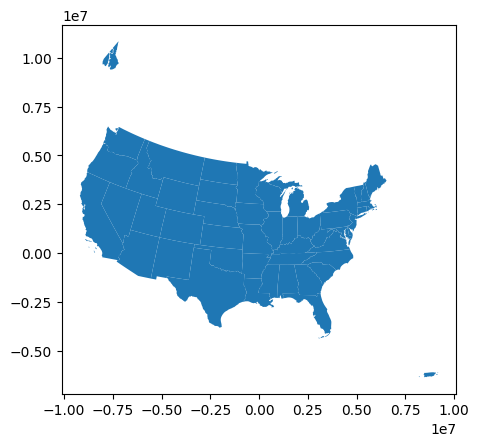

In [14]:
usa_shp.plot()